In [153]:
# Import the necessary packages

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.markers as markers
import glob
import os

if not os.path.exists("Output/experimental_plots"):
    os.mkdir("Output/experimental_plots")

Plotting inertia plots ...
Inertia plot generated! Saved to Output/experimental_plots/inertia_plot.jpg



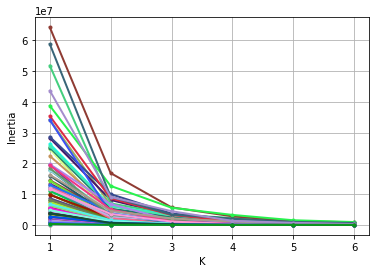

In [154]:
def generate_inertia_plot():
    '''
    This function generates the inertia plot for all 100 images
    '''
    
    # List the csv files inside info_csv generated from the ODM + DEM + KMC module (by running detect.py)
    cluster_features_csvs = glob.glob("Output/info_csv/*.csv")

    print(f"Plotting inertia plots ...")
    
    # Initialize the list to record the list of inertia values for k in range(1,7) for all images
    global_inertia_list = []
    
    # Loop over all the csv files
    for csv in cluster_features_csvs:
        
        # List to store the inertia values for the current csv
        local_inertia_list = []
        
        # Loop 6 times to get the inertia for each value of k
        for k in range(1,7):
            
            # Read from current csv file
            data = pd.read_csv(csv)
            
            # In some cases, there may be less number of objects than the value of k, so we assign k=len(data) in such cases
            if len(data) < k:
                k = len(data)
            
            # We need only left-coordinate and distance features from the data
            data = data[["leftCoord", "distance"]]
            
            # Here, we perform the Kmeans clustering using the given parameters
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=20, tol = 1e-04, random_state = 9)
            
            # Predicting the cluster for each data-points in the data to generate the inertia
            km.fit_predict(data)
            
            # Store the local inertia for the current csv
            local_inertia_list.append(km.inertia_)
        
        # Finally store the local inertia list into the global list
        global_inertia_list.append(local_inertia_list)
    
    # Now we loop over the global list and plot the local inertia at different k-values
    for i, inertia in enumerate(global_inertia_list):
        
        # For reproducibility, we fix the random seed
        np.random.seed((i*25) + 469)
        color = (np.random.random(), np.random.random(), np.random.random())
        
        # PLotting the k-values and respective inertia
        plt.plot(range(1, 7), inertia, marker="o", c = color, linewidth=2, markersize=3)
        plt.xlabel("K")
        plt.ylabel("Inertia")

    plt.grid()
    plt.savefig(f"Output/experimental_plots/inertia_plot.jpg", dpi=300, bbox_inches="tight")
    print(f"Inertia plot generated! Saved to Output/experimental_plots/inertia_plot.jpg\n")

generate_inertia_plot()

Plotting silhouette scores...
Silhouette plot generated! Saved to Output/experimental_plots/silhouette_scores.jpg
Average silhouette score is: 0.5279021533503409



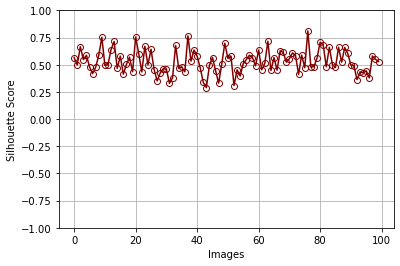

In [155]:
def plot_silhouette_scores():
    '''
    This function plots the silhouette scores for all 100 images
    '''
    
    # Reading the stats file generated from the ODM + DEM + KMC module (by running detect.py)
    data_stats = pd.read_csv("Output/stats.csv")
    print("Plotting silhouette scores...")
    
    # Specifying the marker for the plot
    marker = markers.MarkerStyle(marker='o', fillstyle='none')
    image_num = range(0, len(data_stats))
    
    # Plotting the chart for 100 images with their respective silhouette scores
    plt.plot(image_num, data_stats["silhouette_score"], c = "maroon", marker = marker)
    plt.xlabel("Images")
    plt.ylabel("Silhouette Score")
    
    # Fixing the y-limit since the silhouette score ranges from -1 to +1
    plt.ylim(-1, 1)
    plt.grid()
    plt.savefig("Output/experimental_plots/silhouette_scores.jpg", dpi=300, bbox_inches="tight")

    print("Silhouette plot generated! Saved to Output/experimental_plots/silhouette_scores.jpg")
    avg_sil = np.mean(data_stats["silhouette_score"])
    print(f"Average silhouette score is: {avg_sil}\n")

plot_silhouette_scores()

Plotting time-taken plot...
Time-taken plot generated! Saved to Output/experimental_plots/time_taken.png



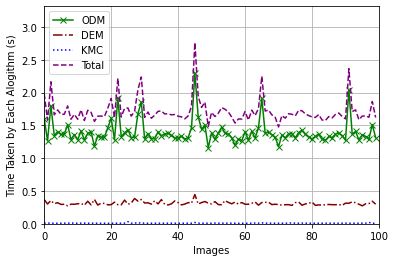

In [156]:
def plot_time_taken():
    '''
    This function plots the time-taken by each module (DEM, ODM, KMC)
    '''
    print("Plotting time-taken plot...")
    
    # Plotting ODM, DEM, KMC times
    x = range(0, len(data_stats))
    plt.plot(x, data_stats["od_time"], c = "green",  linestyle = '-', marker = "x", label="ODM")
    plt.plot(x, data_stats["depth_time"], c="maroon", linestyle = '-.', label="DEM")
    plt.plot(x, data_stats["clustering_time"], c="blue", linestyle = ':', label="KMC")
    
    # Plotting the total time
    data_stats["total_time"] = data_stats["od_time"] + data_stats["depth_time"] + data_stats["clustering_time"]
    plt.plot(x, data_stats["total_time"], c="purple", linestyle = '--', label="Total")
    
    # Adjusting the x and y limits
    plt.ylim(0, max(data_stats["total_time"]) + (0.2 * max(data_stats["total_time"])))
    plt.xlim(0, len(data_stats))
    plt.xlabel("Images")
    plt.ylabel("Time Taken by Each Alogithm (s)")

    plt.legend(loc='upper left')
    plt.grid()
    plt.savefig("Output/experimental_plots/time_taken.png", dpi=300, bbox_inches="tight")

    print("Time-taken plot generated! Saved to Output/experimental_plots/time_taken.png\n")

plot_time_taken()